In [1]:
import pandas as pd

# Load the dataset (adjust the file path as needed)
df = pd.read_csv('indian-ev-data.csv')


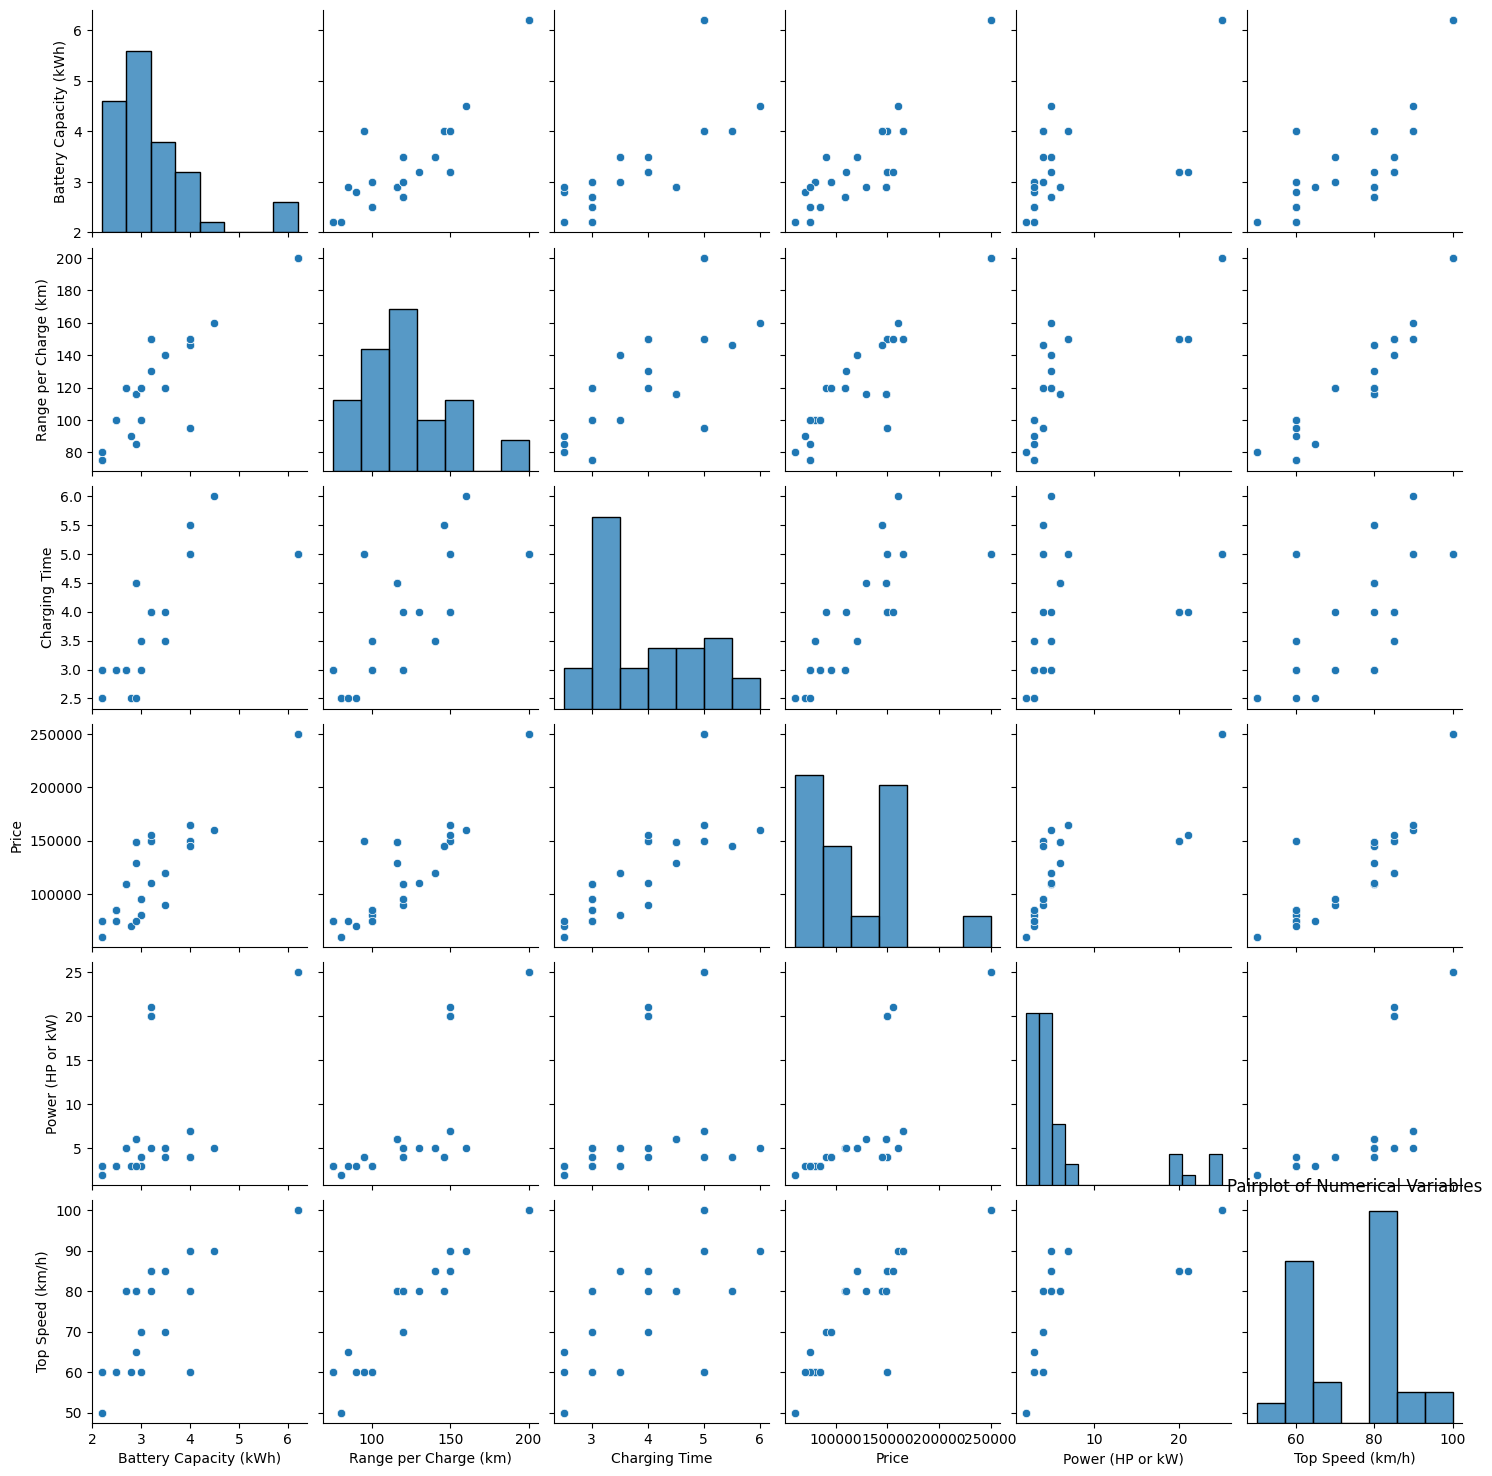

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pairplot
numerical_cols = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']

# Plot pairplot
sns.pairplot(df[numerical_cols])
plt.title('Pairplot of Numerical Variables')
plt.show()


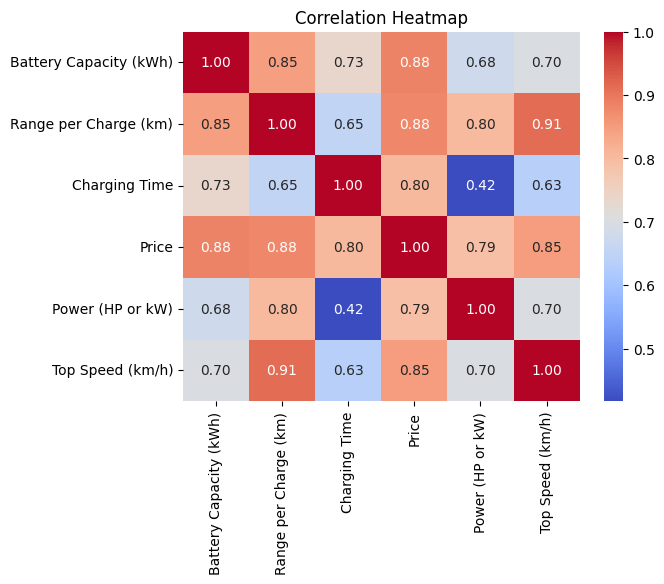

In [3]:
# Compute correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


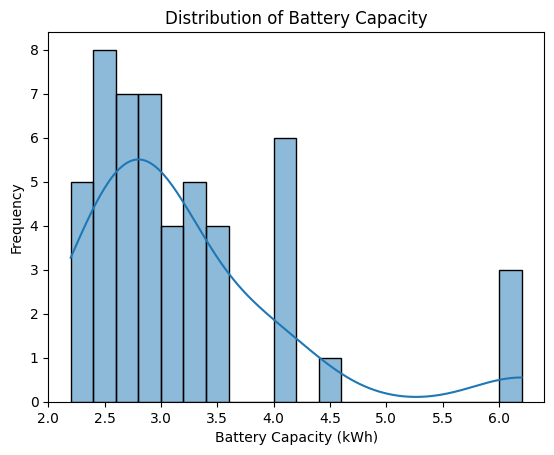

In [4]:
# Plot histogram of Battery Capacity
sns.histplot(df['Battery Capacity (kWh)'], bins=20, kde=True)
plt.title('Distribution of Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Frequency')
plt.show()


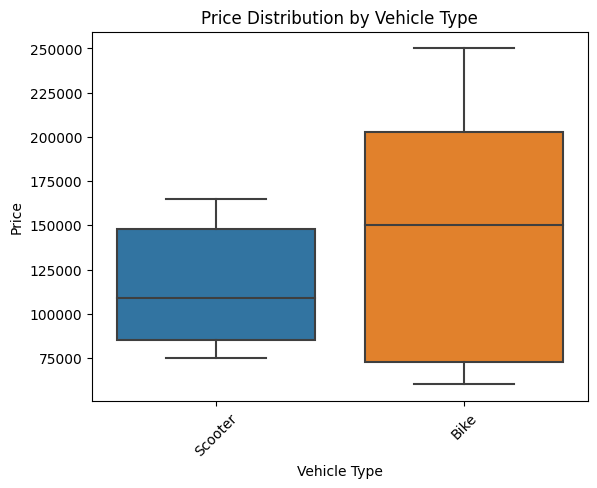

In [5]:
# Plot box plot of Price by Vehicle Type
sns.boxplot(x='Vehicle Type', y='Price', data=df)
plt.title('Price Distribution by Vehicle Type')
plt.xticks(rotation=45)
plt.show()


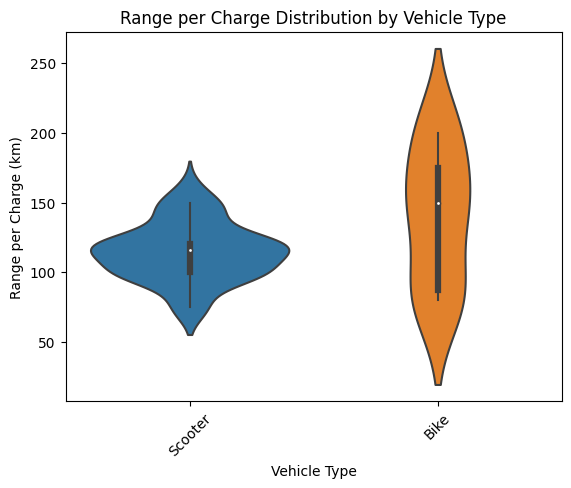

In [6]:
# Plot violin plot of Range per Charge by Vehicle Type
sns.violinplot(x='Vehicle Type', y='Range per Charge (km)', data=df)
plt.title('Range per Charge Distribution by Vehicle Type')
plt.xticks(rotation=45)
plt.show()


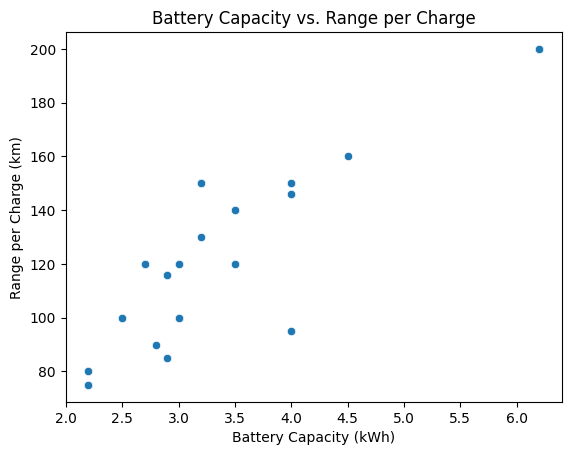

In [7]:
# Plot scatter plot of Battery Capacity vs. Range per Charge
sns.scatterplot(x='Battery Capacity (kWh)', y='Range per Charge (km)', data=df)
plt.title('Battery Capacity vs. Range per Charge')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range per Charge (km)')
plt.show()


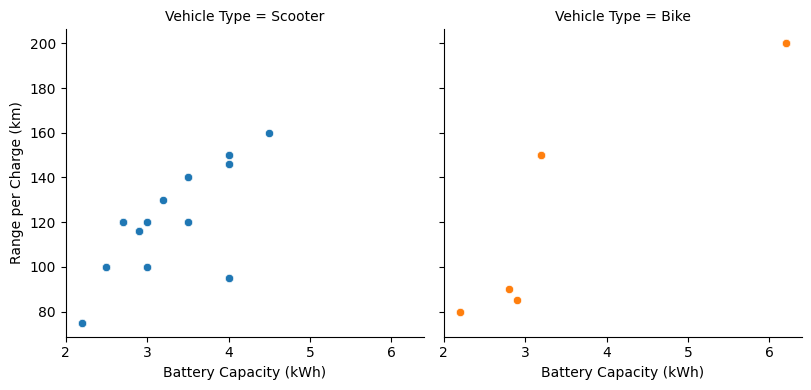

In [8]:
g = sns.FacetGrid(df, col='Vehicle Type', hue='Vehicle Type', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Battery Capacity (kWh)', 'Range per Charge (km)')
plt.show()


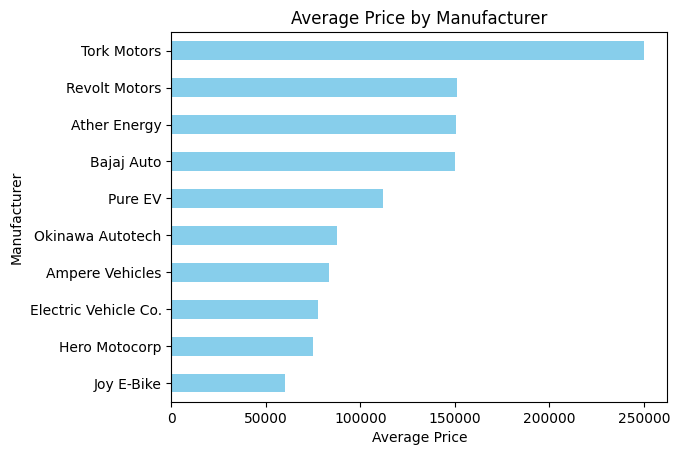

In [9]:
# Plot bar plot of average Price by Manufacturer
avg_price = df.groupby('Manufacturer')['Price'].mean().sort_values()
avg_price.plot(kind='barh', color='skyblue')
plt.title('Average Price by Manufacturer')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.show()


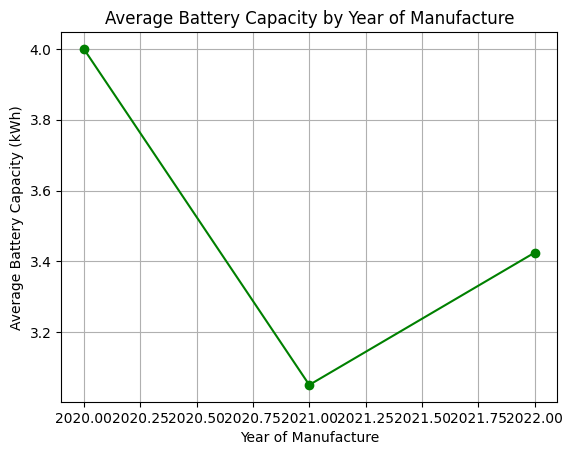

In [10]:
# Plot line plot of average Battery Capacity by Year of Manufacture
avg_battery_capacity = df.groupby('Year of Manufacture')['Battery Capacity (kWh)'].mean()
avg_battery_capacity.plot(kind='line', marker='o', color='green')
plt.title('Average Battery Capacity by Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Battery Capacity (kWh)')
plt.grid(True)
plt.show()


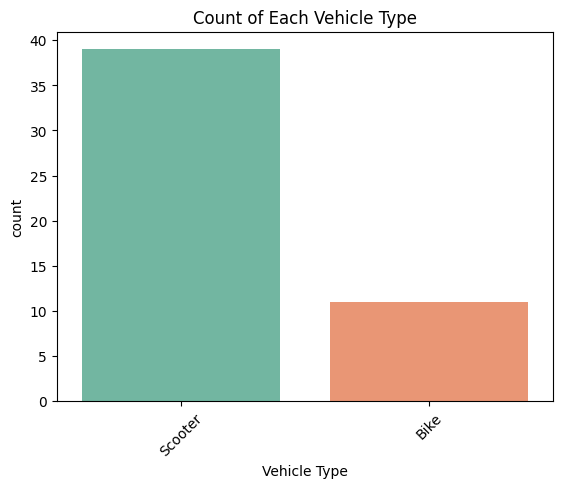

In [11]:
# Plot count plot of Vehicle Type
sns.countplot(x='Vehicle Type', data=df, palette='Set2')
plt.title('Count of Each Vehicle Type')
plt.xticks(rotation=45)
plt.show()


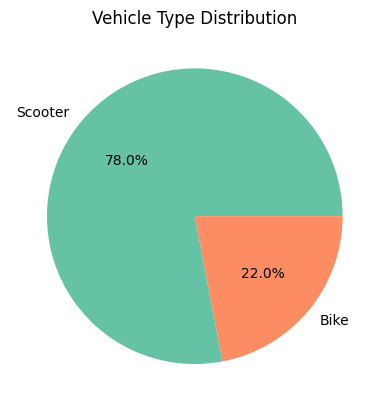

In [12]:
# Plot pie chart of Vehicle Type distribution
vehicle_type_counts = df['Vehicle Type'].value_counts()
vehicle_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Vehicle Type Distribution')
plt.ylabel('')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\2498917320.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Vehicle Type', y='Charging Time', data=df, jitter=True, palette='pastel')


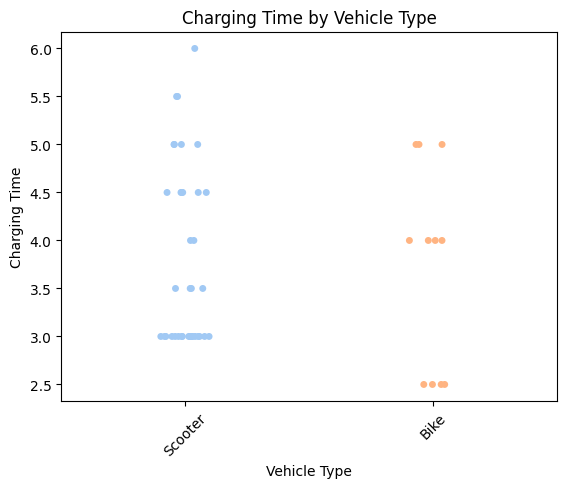

In [13]:
# Plot strip plot of Charging Time by Vehicle Type
sns.stripplot(x='Vehicle Type', y='Charging Time', data=df, jitter=True, palette='pastel')
plt.title('Charging Time by Vehicle Type')
plt.xticks(rotation=45)
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\1109412004.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Vehicle Type', y='Power (HP or kW)', data=df, palette='muted')


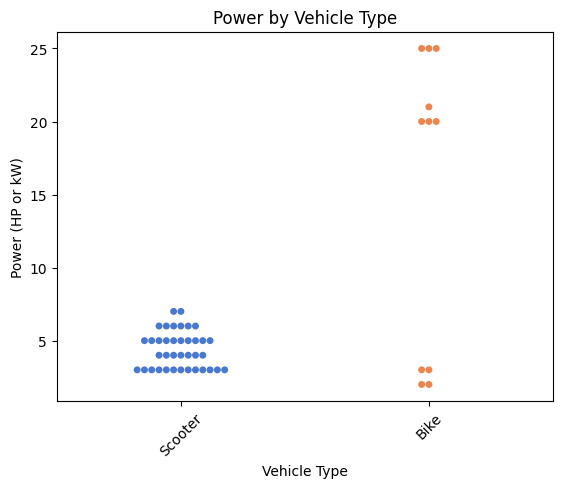

In [14]:
# Plot swarm plot of Power by Vehicle Type
sns.swarmplot(x='Vehicle Type', y='Power (HP or kW)', data=df, palette='muted')
plt.title('Power by Vehicle Type')
plt.xticks(rotation=45)
plt.show()


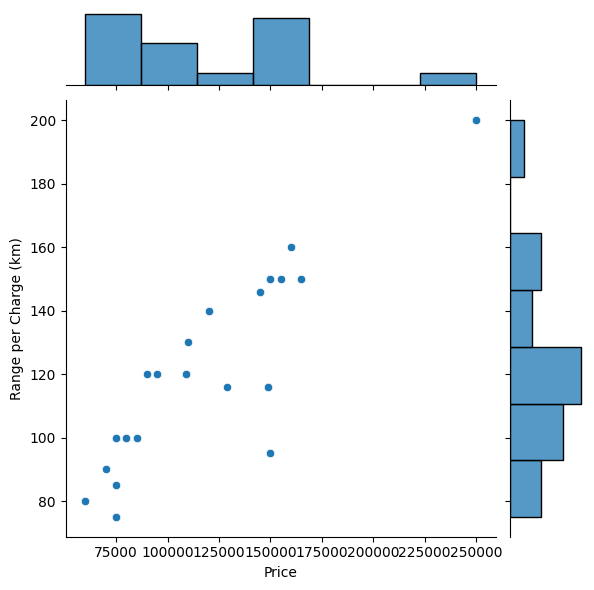

In [15]:
# Plot joint plot of Price and Range per Charge
sns.jointplot(x='Price', y='Range per Charge (km)', data=df, kind='scatter')
plt.show()


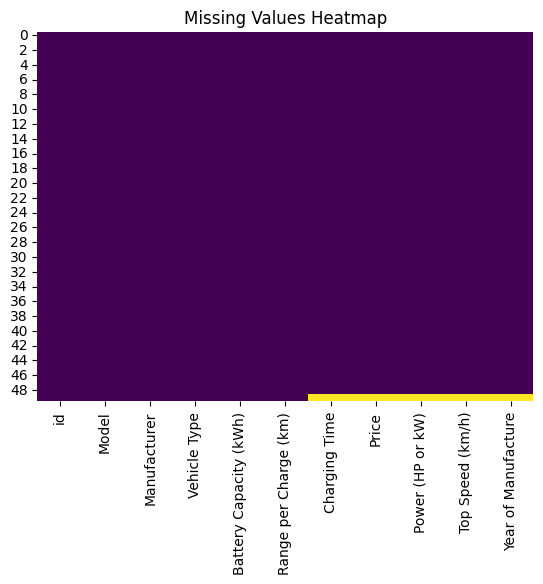

In [16]:
# Plot heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\1243452264.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Top Speed (km/h)'], shade=True, color='orange')


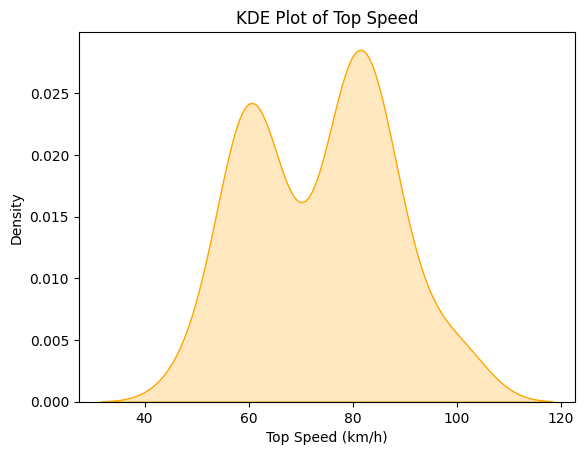

In [17]:
# Plot KDE plot of Top Speed
sns.kdeplot(df['Top Speed (km/h)'], shade=True, color='orange')
plt.title('KDE Plot of Top Speed')
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Density')
plt.show()


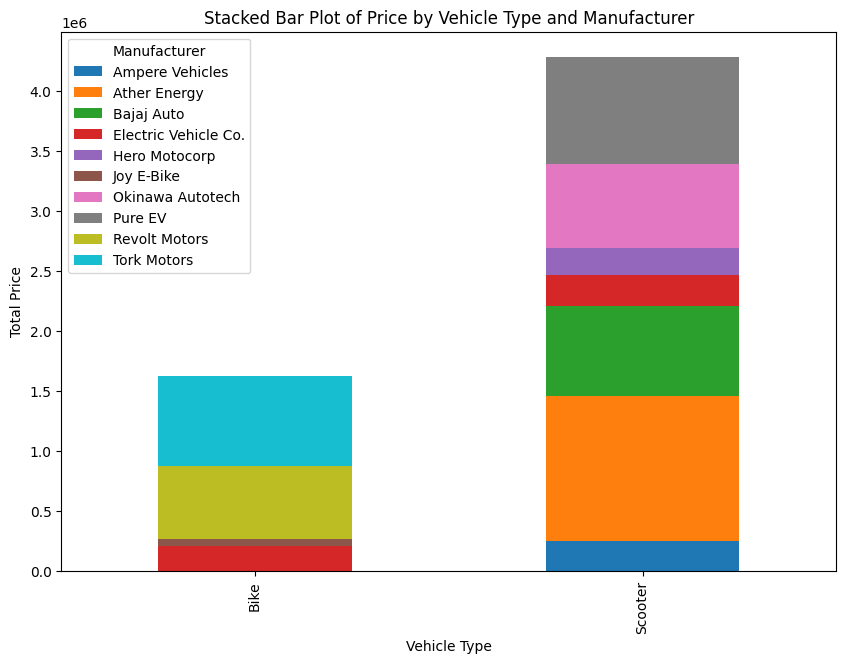

In [18]:
# Example data transformation for stacked bar plot
price_by_type = df.groupby(['Vehicle Type', 'Manufacturer'])['Price'].sum().unstack().fillna(0)
price_by_type.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Stacked Bar Plot of Price by Vehicle Type and Manufacturer')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Price')
plt.legend(title='Manufacturer')
plt.show()


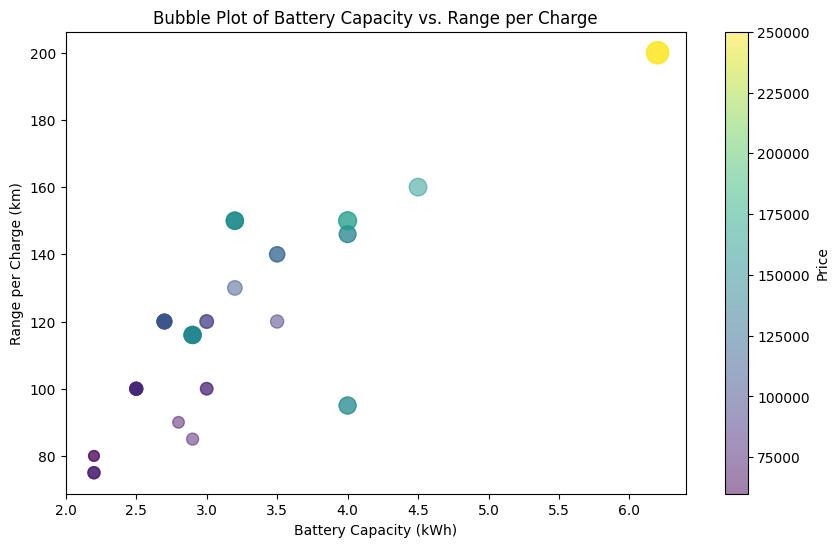

In [19]:
# Plot bubble plot of Battery Capacity vs. Range per Charge with Price as bubble size
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery Capacity (kWh)'], df['Range per Charge (km)'], s=df['Price']/1000, alpha=0.5, c=df['Price'], cmap='viridis')
plt.colorbar(label='Price')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range per Charge (km)')
plt.title('Bubble Plot of Battery Capacity vs. Range per Charge')
plt.show()


In [20]:
from math import pi
import numpy as np

def radar_chart(df, categories, values, title):
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=7)
    ax.plot(angles, values, color='red', linewidth=2, linestyle='solid')
    ax.fill(angles, values, color='red', alpha=0.4)
    
    plt.title(title, size=11, color='red', y=1.1)
    plt.show()

# Example usage for a single manufacturer
example_df = df[df['Manufacturer'] == 'Ather Energy']
radar_chart(example_df[['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']].columns.tolist(), 
            example_df[['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']].iloc[0].tolist(), 
            'Ather Energy')


TypeError: radar_chart() missing 1 required positional argument: 'title'

In [21]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

def radar_chart(categories, values, title):
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values += values[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], categories, color='grey', size=7)
    ax.plot(angles, values, color='red', linewidth=2, linestyle='solid')
    ax.fill(angles, values, color='red', alpha=0.4)
    
    plt.title(title, size=11, color='red', y=1.1)
    plt.show()


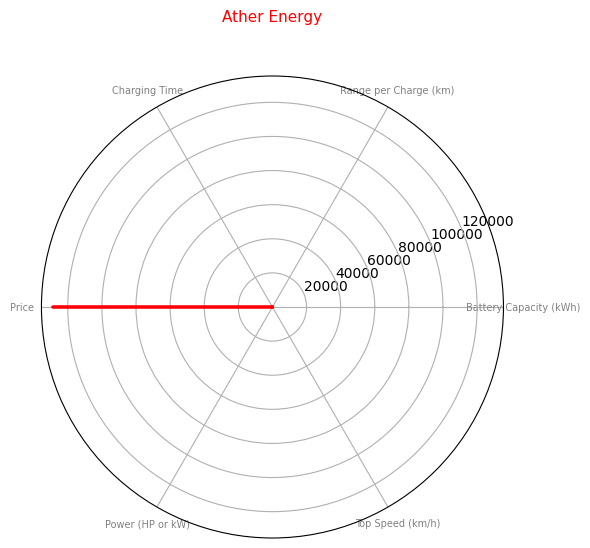

In [22]:
# Example usage for a single manufacturer
example_df = df[df['Manufacturer'] == 'Ather Energy']

# Get the values for the radar chart
values = example_df[['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']].iloc[0].tolist()
categories = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 'Price', 'Power (HP or kW)', 'Top Speed (km/h)']

radar_chart(categories, values, 'Ather Energy')


In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)


In [25]:
df
X_train=df

,id,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,1,Aura 300 Plus,Ather Energy,Scooter,2.9,116,4.5,129000.0,6.0,80.0,2021.0
1,2,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0
2,3,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
3,4,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.5,100,3.0,85000.0,3.0,60.0,2021.0
4,5,Hero Electric Opto EV,Hero Motocorp,Scooter,2.2,75,3.0,75000.0,3.0,60.0,2021.0
5,6,Tork T6X,Tork Motors,Bike,6.2,200,5.0,250000.0,25.0,100.0,2021.0
6,7,Revolt RV400,Revolt Motors,Bike,3.2,150,4.0,150000.0,20.0,85.0,2021.0
7,8,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.0,95,5.0,150000.0,4.0,60.0,2020.0
8,9,Ather 450X,Ather Energy,Scooter,2.9,116,4.5,149000.0,6.0,80.0,2021.0
9,10,Pure EV Epluto 7G,Pure EV,Scooter,2.7,120,3.0,109000.0,5.0,80.0,2021.0


In [24]:
model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [27]:
# Example dataset
data = {
    'id': [1, 2, 3, 4, 5],
    'Model': ['Aura 300 Plus', 'Model X', 'E2O', 'Zippy', 'S400'],
    'Manufacturer': ['Ather Energy', 'Tesla', 'Mahindra', 'Zippy Motors', 'ScooterCorp'],
    'Vehicle Type': ['Scooter', 'SUV', 'Hatchback', 'Sedan', 'Scooter'],
    'Battery Capacity (kWh)': [2.9, 100, 15, 50, 3.5],
    'Range per Charge (km)': [116, 500, 120, 400, 130],
    'Charging Time': [4.5, 10, 6, 8, 5],
    'Price': [129000, 6000000, 750000, 3500000, 145000],
    'Power (HP or kW)': [6, 450, 70, 300, 8],
    'Top Speed (km/h)': [80, 250, 120, 200, 85],
    'Year of Manufacture': [2021, 2020, 2019, 2021, 2022]
}

df = pd.DataFrame(data)


In [28]:
# Selecting features and target variable
features = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time', 
            'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture']
target = 'Price'

X = df[features]
y = df[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [29]:
# Initializing and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:
# Initializing and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 3358320.0
Mean Squared Error (MSE): 11278313222400.0
R-squared (R²): nan


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [32]:
# Displaying feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features)
feature_importance.sort_values(ascending=False, inplace=True)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
Battery Capacity (kWh)    0.204366
Top Speed (km/h)          0.203066
Power (HP or kW)          0.193195
Range per Charge (km)     0.172745
Charging Time             0.163299
Year of Manufacture       0.063329
dtype: float64
